# Edge Detection of Image

## Edge detection

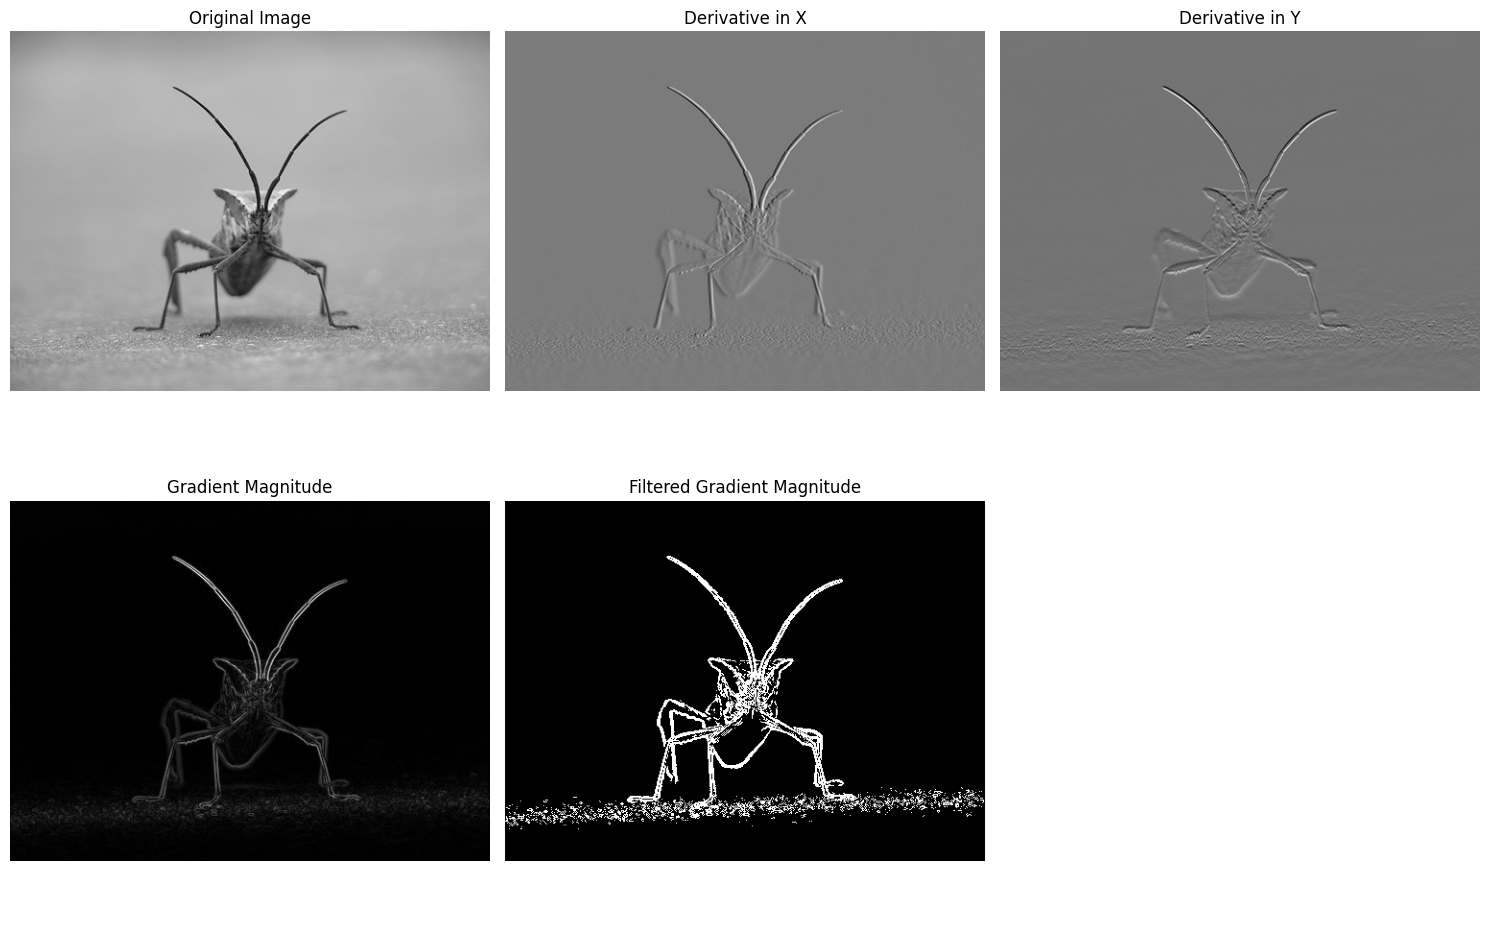

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale if it's not already
img = Image.open('image.png').convert('L')
img = np.asarray(img).astype(np.float32)

# Create a figure and axis object for subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Display original image
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Define delta x
deltaX = 1

# Calculate fx using numpy's gradient function
fx = np.zeros_like(img)
fx[:, 1:-1] = (img[:, 2:] - img[:, :-2]) / (2 * deltaX)

# Display the derivative in X
axs[0, 1].imshow(fx, cmap='gray')
axs[0, 1].set_title('Derivative in X')
axs[0, 1].axis('off')

# Calculate fy using numpy's gradient function
fy = np.zeros_like(img)
fy[1:-1, :] = (img[2:, :] - img[:-2, :]) / (2 * deltaX)

# Display the derivative in Y
axs[0, 2].imshow(fy, cmap='gray')
axs[0, 2].set_title('Derivative in Y')
axs[0, 2].axis('off')

# Calculate the magnitude of the gradient vectors
fgradabs = np.sqrt(fx**2 + fy**2)

# Normalize the gradient magnitude values to [0, 1]
fgradabs_normalized = fgradabs / np.max(fgradabs)

# Display the gradient magnitude
axs[1, 0].imshow(fgradabs_normalized, cmap='gray')
axs[1, 0].set_title('Gradient Magnitude')
axs[1, 0].axis('off')

# Filter out fgradabs_normalized values that are less than the threshold
threshold = 0.1
fgradabs_normalized_filtered = np.where(fgradabs_normalized > threshold, 1.0, 0.0)

# Display the filtered gradient magnitude
axs[1, 1].imshow(fgradabs_normalized_filtered, cmap='gray')
axs[1, 1].set_title('Filtered Gradient Magnitude')
axs[1, 1].axis('off')

# Hide the empty subplot
axs[1, 2].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Simple Diffusion

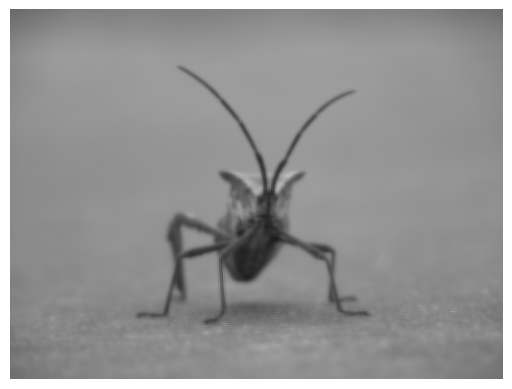

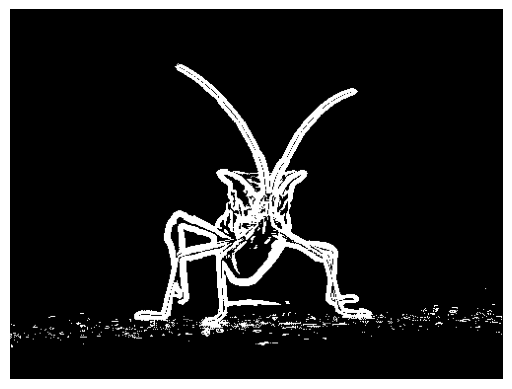

In [21]:
# Load the image
img = np.array(Image.open('image.png')).astype(np.float32)

# Define deltaX, iterations, and deltaT
deltaX = 1
iterations = 5
deltaT = 0.3

for _ in range(iterations):
    # Calculate f_y
    f_y = np.zeros_like(img)
    f_y[:, 1:-1] = (img[:, 2:] - img[:, :-2]) / (2 * deltaX)
    
    # Calculate f_x
    f_x = np.zeros_like(img)
    f_x[1:-1, :] = (img[2:, :] - img[:-2, :]) / (2 * deltaX)
    
    # Calculate f_xx
    f_xx = np.zeros_like(img)
    f_xx[1:-1, :] = (f_x[2:, :] - f_x[:-2, :]) / (2 * deltaX)
    
    # Calculate f_yy
    f_yy = np.zeros_like(img)
    f_yy[:, 1:-1] = (f_y[:, 2:] - f_y[:, :-2]) / (2 * deltaX)

    # Update the image using the heat equation
    img += deltaT * (f_xx + f_yy)

# Clip values to the valid range and convert to uint8
img = np.clip(img, 0, 255).astype(np.uint8)

# Display the resulting image
plt.imshow(img, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

# Calculate the magnitude of the gradient vectors
fgradabs = np.sqrt(f_x**2 + f_y**2)

# Normalize the gradient magnitude values to [0, 1]
fgradabs_normalized = fgradabs / np.max(fgradabs)

# Filter out fgradabs_normalized values that are less than the threshold
threshold = 0.1
fgradabs_normalized_filtered = np.where(fgradabs_normalized > threshold, 1.0, 0.0)

# Display the filtered gradient magnitude
plt.imshow(fgradabs_normalized_filtered, cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

## Perona-Malik eqation for diffusion

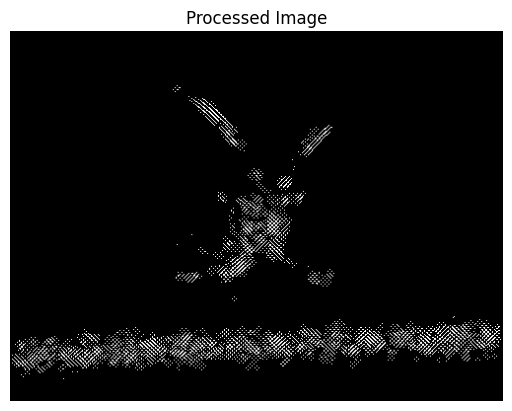

In [34]:
# Load the image and convert it to float32
img = np.array(Image.open('image.png')).astype(np.float32)

# Define parameters
deltaX = 1
iterations = 15
deltaT = 0.5
lam = 20

# Perona-Malik function
def g(x):
    return 1 / (np.sqrt(1 + ((x**2) / (lam**2))))

for i in range(iterations):
    # Calculate f_y using vectorized operations
    f_y = np.zeros_like(img)
    f_y[:, 1:-1] = (img[:, 2:] - img[:, :-2]) / (2 * deltaX)

    # Calculate f_x using vectorized operations
    f_x = np.zeros_like(img)
    f_x[1:-1, :] = (img[2:, :] - img[:-2, :]) / (2 * deltaX)

    # Calculate gradient length
    grad_len = np.sqrt(f_x**2 + f_y**2)

    # Calculate G using the function g
    G = g(grad_len)

    # Calculate I and J
    I = G * f_x
    J = G * f_y

    # Calculate I_x using vectorized operations
    I_x = np.zeros_like(img)
    I_x[:, 1:-1] = (I[:, 2:] - I[:, :-2]) / (2 * deltaX)

    # Calculate J_y using vectorized operations
    J_y = np.zeros_like(img)
    J_y[1:-1, :] = (J[2:, :] - J[:-2, :]) / (2 * deltaX)

    # Update the image using the equation
    img = deltaT * (I_x + J_y)

# Normalize the image
img = img / np.max(img)

# Apply threshold
threshold = 0.2
img = np.where(img > threshold, 1.0, 0.0)

# Display the final image
plt.imshow(img, cmap='gray')
plt.title('Processed Image')
plt.axis('off')  # Turn off axis
plt.show()